In [16]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

In [17]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [18]:
##model 만들기 
input_layer = Input(shape=(32,32,3))
##conv2d출력 = (batch_size,height,width,filters)크기의 4차원 텐서 
conv_layer1 = Conv2D(
    filters=10,
    kernel_size=(4,4),
    strides= 2,
    padding = 'same'
)(input_layer)

conv_layer2 = Conv2D(
    filters=20,
    kernel_size=(3,3),
    strides= 2,
    padding = 'same'
)(conv_layer1)

flatten_layer = Flatten()(conv_layer2)

output_layer = Dense(units=10,activation="softmax")(flatten_layer)

model = Model(input_layer,output_layer)

In [19]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_7 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [20]:
## 배치 정규화, 드롭아웃, leakely relu 등등 다 사용해서 모델만들기 
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [21]:
model.summary()


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0   

In [22]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [23]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 172s 3ms/step - loss: 1.5368 - accuracy: 0.4662 - val_loss: 1.1977 - val_accuracy: 0.5765
Epoch 2/10
50000/50000 [==============================] - 172s 3ms/step - loss: 1.1206 - accuracy: 0.6042 - val_loss: 1.3442 - val_accuracy: 0.5611
Epoch 3/10
50000/50000 [==============================] - 173s 3ms/step - loss: 0.9949 - accuracy: 0.6525 - val_loss: 0.9650 - val_accuracy: 0.6674
Epoch 4/10
50000/50000 [==============================] - 171s 3ms/step - loss: 0.9157 - accuracy: 0.6809 - val_loss: 0.8999 - val_accuracy: 0.6858
Epoch 5/10
50000/50000 [==============================] - 172s 3ms/step - loss: 0.8542 - accuracy: 0.7008 - val_loss: 0.9407 - val_accuracy: 0.6728
Epoch 6/10
50000/50000 [==============================] - 172s 3ms/step - loss: 0.8110 - accuracy: 0.7166 - val_loss: 0.8276 - val_accuracy: 0.7122
Epoch 7/10
50000/50000 [==============================] - 172s

In [24]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 13s 1ms/step


[0.7964792430400849, 0.7312999963760376]

In [25]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

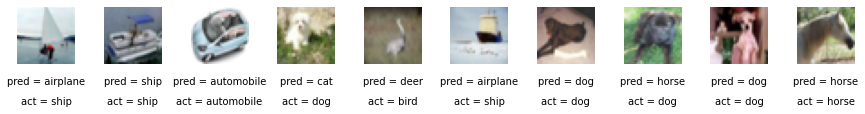

In [26]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)